<a href="https://colab.research.google.com/github/Monalika-P/Extending-existing-tf-model-with-more-classes/blob/main/Extending_existing_tf_model_with_more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author - Monalika P

### Connecting to kaggle

In [1]:
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
! kaggle datasets download -d alessiocorrado99/animals10

animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! unzip /content/animals10.zip

Archive:  /content/animals10.zip
replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Importing the dependencies

In [4]:
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import pandas as pd
from tqdm import tqdm
%matplotlib inline

In [5]:
img_size = (100,100) #Setting all the images to 300 pixels

### Defining function to get data

In [6]:
classes = []

In [7]:
def get_data(data_dir):
  data = []
  count = 0
  print(os.path.basename(data_dir))
  folder = os.path.basename(data_dir)
  classes.append(folder)
  print(folder)
  for img in os.listdir(data_dir):
    try:
      count += 1
      image_array = cv2.imread(os.path.join(data_dir, img), cv2.IMREAD_COLOR)
      resized_array = cv2.resize(image_array, img_size)
      data.append([resized_array, folder])

    except Exception as e:
      print(e)

  print("Collected",count,"no of images")

  return data


In [8]:
data = get_data('/content/raw-img/cane')

cane
cane
Collected 4863 no of images


In [9]:
classes

['cane']

Text(0.5, 1.0, 'cane')

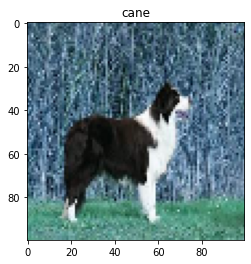

In [10]:
plt.imshow(data[4][0])
plt.title(data[3][1])

In [11]:
data2 = get_data('/content/raw-img/cavallo')

cavallo
cavallo
Collected 2623 no of images


In [12]:
classes

['cane', 'cavallo']

Text(0.5, 1.0, 'cavallo')

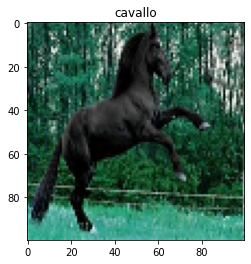

In [13]:
plt.imshow(data2[2][0])
plt.title(data2[1][1])

In [14]:
dataset = data + data2

In [15]:
len(dataset)

7486

In [16]:
print(dataset[4000][1])
print(dataset[7000][1])

cane
cavallo


### Taking the values of X and Y

In [17]:
X = []
Y = []

X contains the images, and Y contains the classes

In [18]:
for i in range(len(dataset)):
  X.append(dataset[i][0])
  Y.append(dataset[i][1])

In [19]:
print(len(X))
print(len(Y))

7486
7486


### Data Normalization

In [20]:
X = np.array(X)
Y = np.array(Y)

In [21]:
X = X / 255.0

### Splitting the data 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [26]:
X_train.shape[1:]

(100, 100, 3)

### Buliding the model

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten, Activation

In [35]:
def build_model():

  model = Sequential()

  model.add(Conv2D(filters = 64, kernel_size= (3,3) , input_shape = X_train.shape[1:], padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 128, kernel_size= (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))

  model.add(Conv2D(filters = 256, kernel_size= (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(2))
  model.add(Activation('sigmoid'))


  return model

In [36]:
model = build_model()

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)      